In [ ]:
import pandas as pd 
import numpy as np
import json
import matplotlib.pyplot as plt
from typing import List
from sim_result_processor import TableProcessor

In [ ]:
with open('./sim_result.json', 'r') as file:
    html_content = json.load(file)

In [ ]:
html = html_content['delta_0_1_point_mass']
sim_result = TableProcessor(html_table=html)
sim_result.table_processor()
sim_result.toarray()
print(sim_result.methods)
print(sim_result.nparray.shape)
print(sim_result.df)

0                   Huber
1                     OLS
2       clarkson_woodruff
3                  normal
4               proposal1
5     proposal1(adaptive)
6               proposal2
7     proposal2(adaptive)
8             sparse_sign
9           uniform_dense
10         uniform_sparse
Name: (k, sketch), dtype: object
(2, 11, 4)
                       20                 40                 80  \
       Unnamed: 1_level_1 Unnamed: 2_level_1 Unnamed: 3_level_1   
0         0.0002 ± 0.0000    0.0002 ± 0.0000    0.0002 ± 0.0000   
1         1.2186 ± 0.0421    1.2186 ± 0.0421    1.2186 ± 0.0421   
2    3087.4627 ± 395.9681   62.4082 ± 2.8958   22.9365 ± 0.9959   
3    3647.9810 ± 470.0464   59.9009 ± 2.6236   22.8845 ± 1.0887   
4    2418.2769 ± 358.4407    2.9827 ± 0.4232    0.0248 ± 0.0021   
5    2734.6393 ± 402.8865   16.5652 ± 1.8400    0.3196 ± 0.0242   
6   8686.2092 ± 1242.3819    0.0144 ± 0.0012    0.0046 ± 0.0003   
7    2501.9426 ± 370.3778   30.7145 ± 2.2962    5.1501 ± 0.4921   


# Plot the Table

In [ ]:
def plot(row:int, col:int, method_exclude:set, tables_to_extract:List, table_titles:List, new_x_labels:List, plot_name:str, xlabel:str, ylable:str='log(MSE)', legend_bbox_to_anchor:tuple=(1.05, 1), figsize:tuple=(12, 8), CI:bool=False):
    # makers and line styles
    markers = ['o', '^', 's', 'D', 'p', '*', 'H', 'x', '+', '1', '2']
    line_styles = ['-', '--', '-.', ':', '-', '--', '-.', ':', '-', '--', '-.']
    colors = plt.cm.tab10(np.linspace(0, 1, 11))

    x = np.linspace(0, 10, len(new_x_labels))

    # plot style
    fig, axes = plt.subplots(row, col, figsize=figsize)
    if not isinstance(axes, np.ndarray): 
        axes = np.array([axes])
    axes = axes.ravel()  # flatten the axes array
    
    for i in range(len(tables_to_extract)):
        table_name = tables_to_extract[i]
        sim_result = TableProcessor(html_table=html_content[table_name])
        sim_result.table_processor()
        sim_result.toarray()
        sim_array = np.log(sim_result.nparray) if plot_name != 'time' else sim_result.nparray

        style_count = 0
        for j, method in enumerate(sim_result.methods):
            if method in method_exclude: continue
            y_estimate = sim_array[0,j,:]
            y_lower = sim_array[0,j,:] - sim_array[1,j,:]
            y_upper = sim_array[0,j,:] + sim_array[1,j,:]
            
            axes[i].plot(x, y_estimate, label=f'{method}', marker=markers[style_count], linestyle=line_styles[style_count], color=colors[style_count], markersize=6, alpha=0.8)
            if CI: axes[i].fill_between(x, y_lower, y_upper, alpha=0.2)  # Confidence interval shading
            style_count += 1

        axes[i].set_title(table_titles[i])
        axes[i].set_xticks(x)
        axes[i].set_xticklabels(new_x_labels)
        # axes[i].set_xlabel('Sketching Size')
        if i == 0: axes[i].set_ylabel(ylable)
        if i == 0: axes[i].legend(loc='upper right', bbox_to_anchor=legend_bbox_to_anchor)

    fig.supxlabel(xlabel)
    fig.savefig(f'./{plot_name}.pdf', format='pdf')
    plt.tight_layout()
    plt.show()


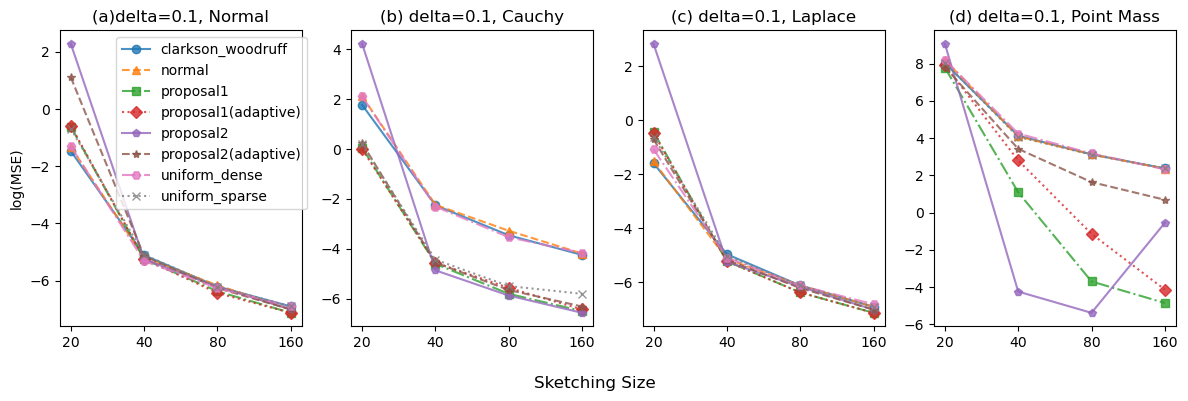

In [ ]:
# vary sketching size
method_exclude = set(['Huber', 'OLS', 'sparse_sign']) # delete sparse_sign for sketching size comparasion'proposal2', 
tables_to_extract = ['delta_0_1_normal', 'delta_0_1_cauchy', 'delta_0_1_laplace', 'delta_0_1_point_mass']
table_titles = ['(a)delta=0.1, Normal', '(b) delta=0.1, Cauchy', '(c) delta=0.1, Laplace', '(d) delta=0.1, Point Mass']
new_x_labels = [20, 40, 80, 160]
row = 1
col = len(tables_to_extract)
plot_name = 'vary_sketching_size'
xlabel = 'Sketching Size'

plot(row, col, method_exclude, tables_to_extract, table_titles, new_x_labels, plot_name, xlabel, figsize = (12, 4))

/var/folders/44/72pmvlr52d96w04q3bmj_jxr0000gn/T/ipykernel_83581/3399535702.py:20: RuntimeWarning: divide by zero encountered in log
  sim_array = np.log(sim_result.nparray) if plot_name != 'time' else sim_result.nparray
/var/folders/44/72pmvlr52d96w04q3bmj_jxr0000gn/T/ipykernel_83581/3399535702.py:20: RuntimeWarning: divide by zero encountered in log
  sim_array = np.log(sim_result.nparray) if plot_name != 'time' else sim_result.nparray
/var/folders/44/72pmvlr52d96w04q3bmj_jxr0000gn/T/ipykernel_83581/3399535702.py:20: RuntimeWarning: divide by zero encountered in log
  sim_array = np.log(sim_result.nparray) if plot_name != 'time' else sim_result.nparray


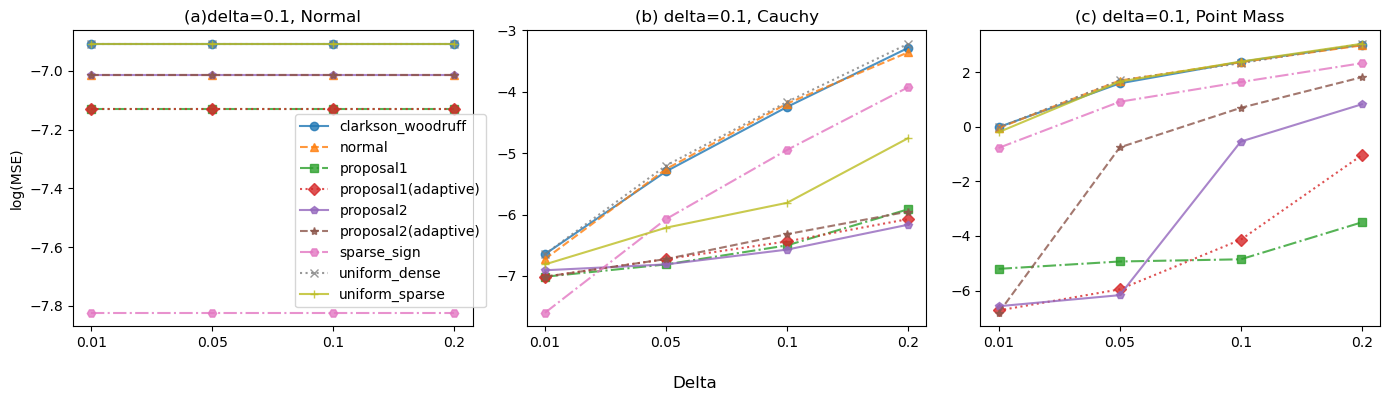

In [ ]:
# contamination grows
method_exclude = set(['Huber', 'OLS']) # delete sparse_sign for sketching size comparasion , 'sparse_sign'
tables_to_extract = ['k_160_normal', 'k_160_cauchy', 'k_160_point_mass']
table_titles = ['(a)delta=0.1, Normal', '(b) delta=0.1, Cauchy', '(c) delta=0.1, Point Mass']
new_x_labels = [0.01, 0.05, 0.1, 0.2]
row = 1
col = len(tables_to_extract)
plot_name = 'vary_contamination'
xlabel = 'Delta'
legend_bbox_to_anchor=(1.05, 0.74)

plot(row, col, method_exclude, tables_to_extract, table_titles, new_x_labels, plot_name, xlabel, legend_bbox_to_anchor = legend_bbox_to_anchor, figsize = (14, 4))

/var/folders/44/72pmvlr52d96w04q3bmj_jxr0000gn/T/ipykernel_83581/3399535702.py:20: RuntimeWarning: divide by zero encountered in log
  sim_array = np.log(sim_result.nparray) if plot_name != 'time' else sim_result.nparray
/var/folders/44/72pmvlr52d96w04q3bmj_jxr0000gn/T/ipykernel_83581/3399535702.py:20: RuntimeWarning: divide by zero encountered in log
  sim_array = np.log(sim_result.nparray) if plot_name != 'time' else sim_result.nparray


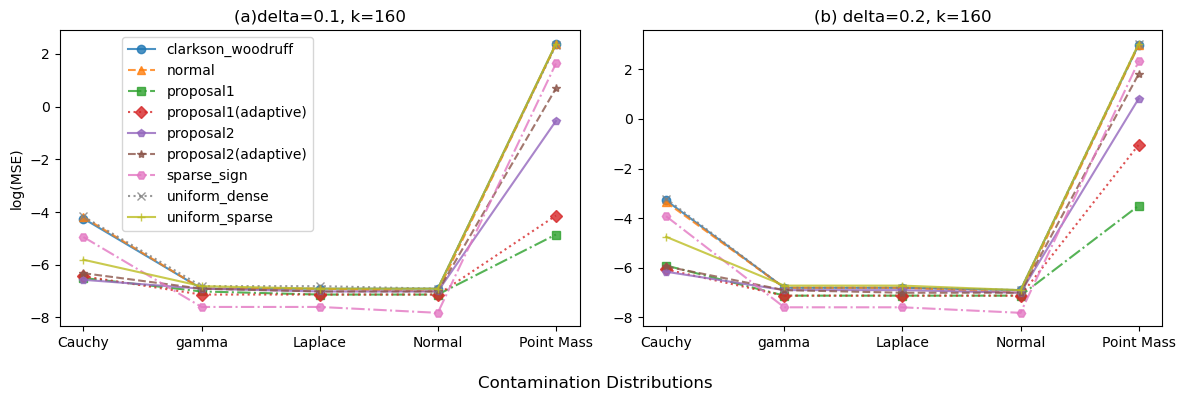

In [ ]:
# contamination distribution
method_exclude = set(['Huber', 'OLS']) # delete sparse_sign for sketching size comparasion , 'sparse_sign'
tables_to_extract = ['contamination_delta_0_1_k_160', 'contamination_delta_0_2_k_160']
table_titles = ['(a)delta=0.1, k=160', '(b) delta=0.2, k=160']
new_x_labels = ['Cauchy', 'gamma', 'Laplace', 'Normal','Point Mass']
row = 1
col = len(tables_to_extract)
plot_name = 'vary_contamination_dist'
xlabel = 'Contamination Distributions'
legend_bbox_to_anchor=(0.5, 1)

plot(row, col, method_exclude, tables_to_extract, table_titles, new_x_labels, plot_name, xlabel, legend_bbox_to_anchor = legend_bbox_to_anchor, figsize = (12, 4))

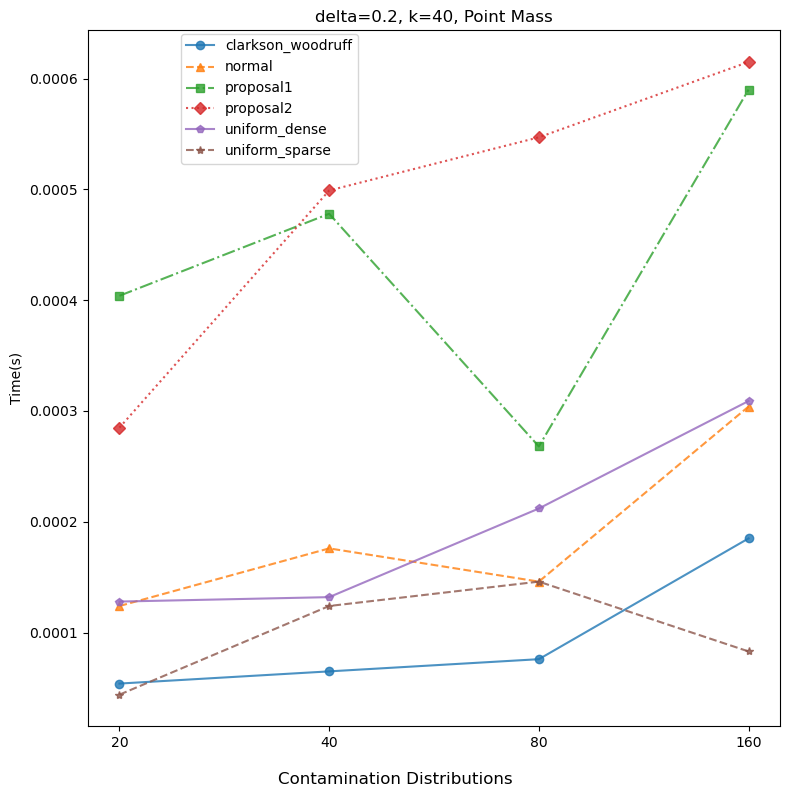

In [ ]:
# time
method_exclude = set(['Huber', 'OLS', 'sparse_sign']) # delete sparse_sign for sketching size comparasion 
tables_to_extract = ['time_delta_0_2_k_40_point_mass']
table_titles = ['delta=0.2, k=40, Point Mass']
new_x_labels = [20, 40, 80, 160]
row = 1
col = len(tables_to_extract)
plot_name = 'time'
xlabel = 'Contamination Distributions'
ylable = 'Time(s)'
legend_bbox_to_anchor=(0.4, 1.005)

plot(row, col, method_exclude, tables_to_extract, table_titles, new_x_labels, plot_name, xlabel, ylable = ylable, legend_bbox_to_anchor = legend_bbox_to_anchor, figsize = (8, 8))

Note: 
- delete sparse_sign for sketching size comparasion
- Try marker and line style.
- comment on the trend and how better our methods are 